### Task 1 - Dummy data creation

Note: if you are using np.random.seed() function to generate random data - you may get different results.

1. Population Data
  * Create a poisson distribution (population_1) of 16,000 samples with a random mean in the range (30-35)
  * Create another poisson distribution (population_2) of 12,000 samples with a random mean in the range (10-15)
  * Create a population data by combining population_1 and population_2

2. Sample data 
* Create a poisson distribution (sample_1) with a random mean in the range (25-30)
  * Create another poisson distribution (sample_2) with a random mean in the range (10-15)
  * Create a sample data by combining sample_1 and sample_2
  * you are free to choose the size for sample_1 and sample_2 but total sample size must be between 40-50.

In [82]:
# Import relevant libraries
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random

# Dummy data creation
#Population data
population_1 = stats.poisson.rvs(random.randrange(30,35), size=16000)
population_2 = stats.poisson.rvs(random.randrange(10,15), size=12000)

pop = np.concatenate((population_1, population_2))

#Sample data
sample_1 = stats.poisson.rvs(random.randrange(20,25), size=30)
sample_2 = stats.poisson.rvs(random.randrange(10,15), size=20)

sample = np.concatenate((sample_1, sample_2))


### Task 2 - Perform normality test for the sample data and state weather the given sample data is good for parametric testing (t-testing). You can look into normality tests that were not covered in class including Shapiro–Wilks test and the Kolmogorov–Smirnov test. You may use np.random.seed() to improve normality of the data.

The population mean is:  23.26625
The population median is:  25.0


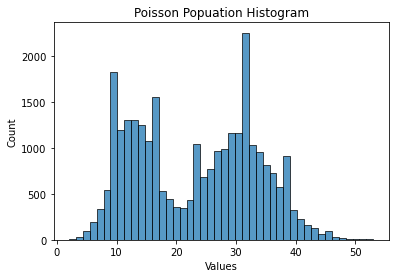

In [16]:
# 
print("The population mean is: ", np.mean(pop))
print("The population median is: ", np.median(pop))

sns.histplot(pop)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Poisson Popuation Histogram')
plt.show()

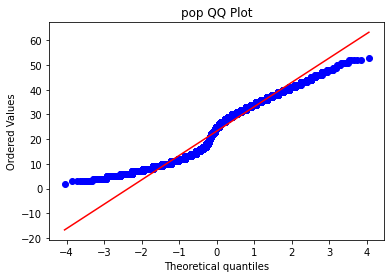

In [21]:
stats.probplot(pop, plot=sns.mpl.pyplot)
plt.title("pop QQ Plot")
plt.show()

After the graphical tests, it does not seem like it is a normal distribution. However, it could be considered as a double normal distribution. We will now perform numerical tests to determine it's normality. We assume a significance level of 0.05.

H0: The distribution is normal

H1: The distribution is not normal

<h4>Shapiro-Wilks test</h4>

In [22]:
stat, p = stats.shapiro(pop)
print(p)

if p <= 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

0.0
We reject the null hypothesis


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<h4>Normality test</h4>

In [28]:
stat, p = stats.normaltest(pop)
print("{:.20} {:.20}".format(stat, p))

if p <= 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

26960.298069834545458 0.0
We reject the null hypothesis


<h4>Kolmogorov-Smirnov test</h4>

In [30]:
stat, p = stats.kstest(pop, 'norm')
print("{:.20} {:.20}".format(stat, p))

if p <= 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

0.99950404304388118515 0.0
We reject the null hypothesis


All 3 tests have rejected the null hypothesis. Therefore, we reject that the distribution is normal or gaussian.

### Task 3 -  Conduct a one-sample t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population.

The sample mean is:  16.54
The sample median is:  16.5


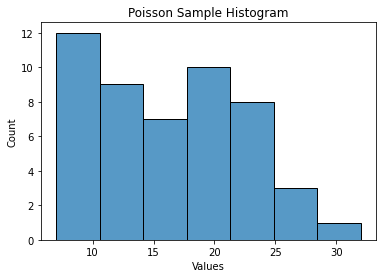

In [83]:
# Generate and plot poisson distribution. You can create additional code cells to display outputs
print("The sample mean is: ", np.mean(sample))
print("The sample median is: ", np.median(sample))

sns.histplot(sample)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Poisson Sample Histogram')
plt.show()

In [84]:
stat, p = stats.ttest_1samp(sample, np.mean(pop))

print(p)

if p <= 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

9.446428910712536e-11
We reject the null hypothesis


As the p-value is less than 0.05, we reject the null hypothesis.

### Task 4 - In a poll of 400 randomly selected Irish population, 250 said yes to the question “Are you familiar with machine learning?”. 

* Construct the 95% confidence interval for the proportion of all Irish who are familiar with machine learning. Interpret the confidence interval.

* Test the claim using 10% significance level that less than 60% of the Irish population are familiar with the machine learning.




In [79]:
#We can use the CLT. As the distribution is composed of proportions, we can build a normal distribution
ci = stats.norm.interval(0.05, loc=250/400)

print("The confidence interval is", ci)

The confidence interval is (0.5622932220567861, 0.6877067779432139)


This result means that if we were to take another sample from the population, proportion of Irish people who are familiar with machine learning would lie between these 2 values.

We state the hypothesis:

H0: Less than 60% of the Irish population are familiar with machine learning

H1: Exactly or more than 60% of the Irish population are familiar with machine learning

In [80]:
ci = stats.norm.interval(0.1, loc=250/400)

print("The confidence interval is", ci)

The confidence interval is (0.499338653144926, 0.7506613468550741)


In [90]:
p = stats.binom_test(0.6*400, 400, 250/400)
print(p)

0.30211449932828666


Considering that 0.6 is within the confidence intervals when using a 10% significance level, we fail to reject the null hypothesis because 0.6 is not within the rejection region. This is also supported by the fact that the p-value is greater than the significance level.

### Task 5 - Convert the proportion analysis done on lecture slide between 28-35 into python code and compare the results discussed in class.

H0: The difference between the proportions of individuals that responded to the treatment is equal in both groups.

H1: The difference between the proportions of individuals that responded to the treatment is not equal in both groups.

In [100]:
p1 = 20/60
p2 = 35/70

pHat = (20+35)/(60+70)

zScore = (p1-p2) / math.sqrt(pHat * (1-pHat) * ((1/60) + (1/70)))
print(zScore)
#We multiply by 2 because it is a 2-tailed test
p = stats.norm.cdf(zScore)*2
print(p)

-1.9174899417644093
0.055175717585989874
